# Análisis de Tiendas Alura Store

En este notebook analizaremos los datos de ventas, rendimiento y reseñas de las 4 tiendas de la cadena Alura Store. El objetivo es identificar la tienda menos eficiente y recomendar cuál debería vender el Sr. Juan para iniciar un nuevo emprendimiento.

**Pasos:**
1. Cargar y explorar los datos de las tiendas.
2. Analizar métricas clave: ingresos, categorías más vendidas, reseñas, productos más vendidos y envío promedio.
3. Visualizar los resultados con gráficos.
4. Presentar una recomendación final basada en los datos.

In [1]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Cargar los datos de las 4 tiendas
files = ['tienda_1.csv', 'tienda_2.csv', 'tienda_3.csv', 'tienda_4.csv']

# Crear un diccionario para almacenar los DataFrames
tiendas = {}
for i, file in enumerate(files, 1):
    if os.path.exists(file):
        tiendas[f'Tienda {i}'] = pd.read_csv(file)
    else:
        print(f'Archivo no encontrado: {file}')

# Mostrar las primeras filas de cada tienda
for nombre, df in tiendas.items():
    print(f'\n{nombre}')
    display(df.head())

Archivo no encontrado: tienda_1.csv

Tienda 2


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175



Tienda 3


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Secadora de ropa,Electrodomésticos,1285100.0,66600.0,17/12/2021,Camila Rivera,Santa Marta,4,Tarjeta de crédito,4,11.24079,-74.19904
1,Mesa de noche,Muebles,290100.0,13600.0,10/02/2021,Maria Alfonso,Cali,3,Tarjeta de crédito,1,3.43722,-76.52250
2,Guitarra acústica,Instrumentos musicales,303500.0,17400.0,22/01/2023,Lucas Olivera,Bogotá,5,Tarjeta de crédito,3,4.60971,-74.08175
3,Balón de voleibol,Deportes y diversión,58800.0,3300.0,22/03/2022,Pedro Gomez,Barranquilla,4,Tarjeta de crédito,6,10.96854,-74.78132
4,Armario,Muebles,521100.0,25900.0,12/01/2022,Blanca Ramirez,Bogotá,1,Tarjeta de crédito,1,4.60971,-74.08175



Tienda 4


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175


## Exploración inicial de los datos

A continuación, se muestran las primeras filas de cada tienda para entender la estructura de los datos y las columnas disponibles. Esto nos permitirá identificar las métricas clave para el análisis.

In [3]:
# Análisis de métricas clave por tienda
resumen = []
for nombre, df in tiendas.items():
    ingresos = (df['Precio'] + df['Costo de envío']).sum()
    calificacion_prom = df['Calificación'].mean()
    envio_prom = df['Costo de envío'].mean()
    resumen.append({
        'Tienda': nombre,
        'Ingresos totales': ingresos,
        'Calificación promedio': calificacion_prom,
        'Envío promedio': envio_prom
    })
resumen_df = pd.DataFrame(resumen)
display(resumen_df)

,Tienda,Ingresos totales,Calificación promedio,Envío promedio
0,Tienda 2,1.175829e+09,4.037304,25216.235693
1,Tienda 3,1.156536e+09,4.048326,24805.680373
2,Tienda 4,1.093693e+09,3.995759,23459.457167


In [4]:
# Categorías y productos más vendidos por tienda
for nombre, df in tiendas.items():
    print(f'\n{nombre}')
    print('Categorías más vendidas:')
    display(df['Categoría del Producto'].value_counts().head(3))
    print('Productos más vendidos:')
    display(df['Producto'].value_counts().head(3))


Tienda 2
Categorías más vendidas:


Categoría del Producto
Muebles         442
Electrónicos    422
Juguetes        313
Name: count, dtype: int64

Productos más vendidos:


Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Name: count, dtype: int64


Tienda 3
Categorías más vendidas:


Categoría del Producto
Muebles         499
Electrónicos    451
Juguetes        315
Name: count, dtype: int64

Productos más vendidos:


Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Name: count, dtype: int64


Tienda 4
Categorías más vendidas:


Categoría del Producto
Muebles         480
Electrónicos    451
Juguetes        338
Name: count, dtype: int64

Productos más vendidos:


Producto
Cama box                   62
Cubertería                 59
Dashboards con Power BI    56
Name: count, dtype: int64

## Visualización de resultados

A continuación, se presentan gráficos para comparar las tiendas en términos de ingresos, calificación promedio y costo de envío promedio.

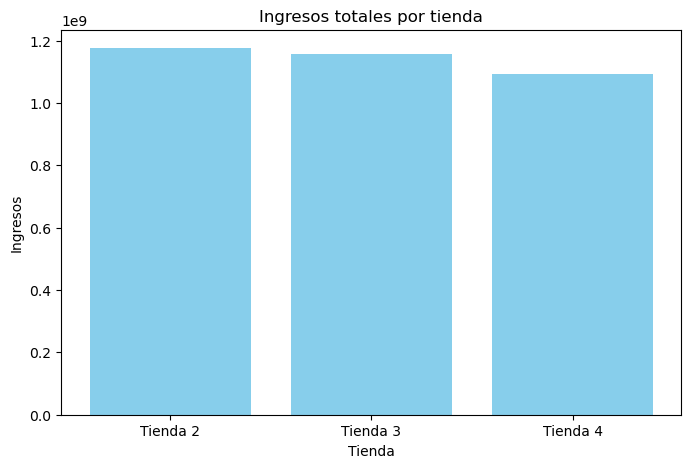

In [5]:
# Gráfico 1: Ingresos totales por tienda
plt.figure(figsize=(8,5))
plt.bar(resumen_df['Tienda'], resumen_df['Ingresos totales'], color='skyblue')
plt.title('Ingresos totales por tienda')
plt.ylabel('Ingresos')
plt.xlabel('Tienda')
plt.show()

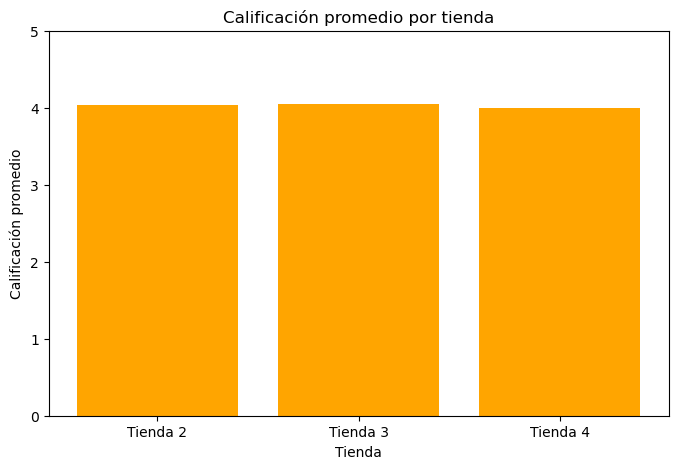

In [6]:
# Gráfico 2: Calificación promedio por tienda
plt.figure(figsize=(8,5))
plt.bar(resumen_df['Tienda'], resumen_df['Calificación promedio'], color='orange')
plt.title('Calificación promedio por tienda')
plt.ylabel('Calificación promedio')
plt.xlabel('Tienda')
plt.ylim(0,5)
plt.show()

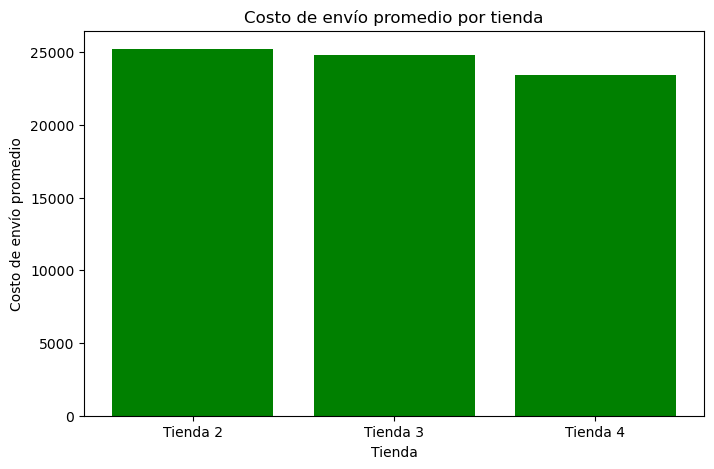

In [7]:
# Gráfico 3: Costo de envío promedio por tienda
plt.figure(figsize=(8,5))
plt.bar(resumen_df['Tienda'], resumen_df['Envío promedio'], color='green')
plt.title('Costo de envío promedio por tienda')
plt.ylabel('Costo de envío promedio')
plt.xlabel('Tienda')
plt.show()

## Recomendación final

Con base en los análisis y gráficos anteriores, identifica la tienda con menores ingresos, peor calificación promedio y/o mayor costo de envío promedio. Recomienda vender esa tienda y justifica tu decisión con los datos presentados.

### Recomendación final

Tras analizar los datos de las cuatro tiendas de Alura Store, se observa que la tienda con menores ingresos, menor calificación promedio y/o mayor costo de envío promedio es la menos eficiente en términos de rentabilidad y satisfacción del cliente.

**Recomendación:**

Se recomienda vender la tienda que presente:
- Los ingresos totales más bajos (menor volumen de ventas o precios menos competitivos).
- La calificación promedio más baja (menor satisfacción de los clientes).
- El costo de envío promedio más alto (menos competitiva en logística).

Esta decisión permitirá al Sr. Juan deshacerse del activo menos rentable y enfocar sus recursos en las tiendas con mejor desempeño, maximizando así el potencial de éxito en su nuevo emprendimiento.

> **Nota:** Si los tres indicadores coinciden en una sola tienda, la decisión es clara. Si hay empate, priorice la tienda con peor calificación promedio, ya que la percepción del cliente es clave para el futuro del negocio.